In [143]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv('dataset/readyYelp.csv', index_col=0, low_memory=False)

df.head(5)

,review_id,user_id,business_id,stars_x,useful_x,funny_x,cool_x,text,date,hours.Wednesday,attributes.RestaurantsDelivery,attributes.Open24Hours,attributes.DogsAllowed,attributes.CoatCheck,postal_code,attributes.Smoking,hours.Thursday,attributes.DietaryRestrictions,city,hours.Tuesday,attributes.RestaurantsGoodForGroups,attributes.BYOB,attributes.AgesAllowed,hours.Friday,stars_y,latitude,attributes.Alcohol,attributes.RestaurantsPriceRange2,attributes.RestaurantsTableService,attributes.HairSpecializesIn,attributes.RestaurantsCounterService,attributes.Corkage,attributes.GoodForKids,categories,name_x,attributes.BusinessAcceptsBitcoin,attributes.HappyHour,attributes.WheelchairAccessible,attributes.BusinessAcceptsCreditCards,attributes.BYOBCorkage,is_open,attributes.Ambience,longitude,hours.Monday,attributes.BestNights,hours.Saturday,review_count_x,attributes.ByAppointmentOnly,attributes.NoiseLevel,state,attributes.DriveThru,attributes.HasTV,attributes.WiFi,attributes.Music,hours,attributes.BusinessParking,address,attributes.RestaurantsAttire,hours.Sunday,attributes.GoodForMeal,attributes.GoodForDancing,attributes.Caters,attributes.AcceptsInsurance,attributes.RestaurantsReservations,attributes,attributes.RestaurantsTakeOut,attributes.BikeParking,attributes.OutdoorSeating,Category_Active Life,Category_Adult Entertainment,Category_Afghan,Category_African,Category_Airlines,Category_Airport Shuttles,Category_Airports,Category_American (New),Category_American (Traditional),Category_Amusement Parks,Category_Appliances & Repair,Category_Aquariums,Category_Arcades,Category_Architectural Tours,Category_Argentine,Category_Art Galleries,Category_Art Museums,Category_Arts & Entertainment,Category_Asian Fusion,Category_Auto Detailing,Category_Auto Parts & Supplies,Category_Auto Repair,Category_Auto Upholstery,Category_Automotive,Category_Bagels,Category_Bakeries,Category_Barbeque,Category_Bars,Category_Basque,Category_Beauty & Spas,Category_Beer,Category_Beer Bar,Category_Beer Gardens,Category_Beer Tours,Category_Belgian,Category_Blow Dry/Out Services,Category_Body Shops,Category_Books,Category_Bookstores,Category_Bowling,Category_Brasseries,Category_Brazilian,Category_Breakfast & Brunch,Category_Breweries,Category_Brewpubs,Category_Buffets,Category_Burgers,Category_Cafes,Category_Cajun/Creole,Category_Candy Stores,Category_Cantonese,Category_Car Dealers,Category_Car Rental,Category_Car Wash,Category_Caribbean,Category_Carpet Cleaning,Category_Caterers,Category_Cheese Shops,Category_Chicken Shop,Category_Chicken Wings,Category_Chinese,Category_Cinema,Category_Cocktail Bars,Category_Coffee & Tea,Category_Coffee Roasteries,Category_Comedy Clubs,Category_Comfort Food,Category_Community Service/Non-Profit,Category_Computers,Category_Conveyor Belt Sushi,Category_Cosmetic Surgeons,Category_Cosmetics & Beauty Supply,Category_Cosmetology Schools,Category_Creperies,Category_Cuban,Category_Dance Clubs,Category_Day Spas,Category_Delis,Category_Department Stores,Category_Dermatologists,Category_Desserts,Category_Dim Sum,Category_Diners,Category_Dinner Theater,Category_Discount Store,Category_Dive Bars,Category_Doctors,Category_Donuts,Category_Education,Category_Electronics,Category_Ethiopian,Category_Ethnic Food,Category_Event Planning & Services,Category_Eyelash Service,Category_Fashion,Category_Fast Food,Category_Filipino,Category_Flooring,Category_Flowers & Gifts,Category_Food,Category_Food Delivery Services,Category_Food Stands,Category_Food Trucks,Category_French,Category_Furniture Assembly,Category_Furniture Stores,Category_Gas Stations,Category_Gastropubs,Category_Gay Bars,Category_German,Category_Gift Shops,Category_Gluten-Free,Category_Greek,Category_Grout Services,Category_Hair Removal,Category_Hair Salons,Category_Halal,Category_Handyman,Category_Haunted Houses,Category_Hawaiian,Category_Health & Medical,Category_Heating & Air Conditioning/HVAC,Category_Hiking,Category_Historical Tours,Category_Home & Garden,Category_Home Cleaning,Category_Home Dec

In [144]:
dfBus = pd.read_csv('dataset/businesses.csv')

## Zadání a očekávané otázky

### Zadání:
    Objednala si vás národní turistická agentura, abyste zhodnotili vybraná města a jejich návštěvníky podle recenzí podniků.
### Otázky
     Efa - Rozdělit recenze na pozitivní/negativní za použití SpaCY a pak dál řešit ty atributy města atd.?
        
        Jak se liší ->Podniky
                    ->Kategorie podniků dle města
                    ->Kategorie podniků a jak/jestli se liší jejich hodnocení
                    ->Podniky a jak/jestli se liší jejich hodnocení na základě různých vlastností (attributes, meals, ambience)
                    ->
                    ->Zákazníci
                    ->recenz zákazníků dle města (keywords, stars)
                    -> atd. nevím, seru na to dneska

In [145]:
from IPython.display import display

pd.options.display.max_columns = None
display(df)

,review_id,user_id,business_id,stars_x,useful_x,funny_x,cool_x,text,date,hours.Wednesday,attributes.RestaurantsDelivery,attributes.Open24Hours,attributes.DogsAllowed,attributes.CoatCheck,postal_code,attributes.Smoking,hours.Thursday,attributes.DietaryRestrictions,city,hours.Tuesday,attributes.RestaurantsGoodForGroups,attributes.BYOB,attributes.AgesAllowed,hours.Friday,stars_y,latitude,attributes.Alcohol,attributes.RestaurantsPriceRange2,attributes.RestaurantsTableService,attributes.HairSpecializesIn,attributes.RestaurantsCounterService,attributes.Corkage,attributes.GoodForKids,categories,name_x,attributes.BusinessAcceptsBitcoin,attributes.HappyHour,attributes.WheelchairAccessible,attributes.BusinessAcceptsCreditCards,attributes.BYOBCorkage,is_open,attributes.Ambience,longitude,hours.Monday,attributes.BestNights,hours.Saturday,review_count_x,attributes.ByAppointmentOnly,attributes.NoiseLevel,state,attributes.DriveThru,attributes.HasTV,attributes.WiFi,attributes.Music,hours,attributes.BusinessParking,address,attributes.RestaurantsAttire,hours.Sunday,attributes.GoodForMeal,attributes.GoodForDancing,attributes.Caters,attributes.AcceptsInsurance,attributes.RestaurantsReservations,attributes,attributes.RestaurantsTakeOut,attributes.BikeParking,attributes.OutdoorSeating,Category_Active Life,Category_Adult Entertainment,Category_Afghan,Category_African,Category_Airlines,Category_Airport Shuttles,Category_Airports,Category_American (New),Category_American (Traditional),Category_Amusement Parks,Category_Appliances & Repair,Category_Aquariums,Category_Arcades,Category_Architectural Tours,Category_Argentine,Category_Art Galleries,Category_Art Museums,Category_Arts & Entertainment,Category_Asian Fusion,Category_Auto Detailing,Category_Auto Parts & Supplies,Category_Auto Repair,Category_Auto Upholstery,Category_Automotive,Category_Bagels,Category_Bakeries,Category_Barbeque,Category_Bars,Category_Basque,Category_Beauty & Spas,Category_Beer,Category_Beer Bar,Category_Beer Gardens,Category_Beer Tours,Category_Belgian,Category_Blow Dry/Out Services,Category_Body Shops,Category_Books,Category_Bookstores,Category_Bowling,Category_Brasseries,Category_Brazilian,Category_Breakfast & Brunch,Category_Breweries,Category_Brewpubs,Category_Buffets,Category_Burgers,Category_Cafes,Category_Cajun/Creole,Category_Candy Stores,Category_Cantonese,Category_Car Dealers,Category_Car Rental,Category_Car Wash,Category_Caribbean,Category_Carpet Cleaning,Category_Caterers,Category_Cheese Shops,Category_Chicken Shop,Category_Chicken Wings,Category_Chinese,Category_Cinema,Category_Cocktail Bars,Category_Coffee & Tea,Category_Coffee Roasteries,Category_Comedy Clubs,Category_Comfort Food,Category_Community Service/Non-Profit,Category_Computers,Category_Conveyor Belt Sushi,Category_Cosmetic Surgeons,Category_Cosmetics & Beauty Supply,Category_Cosmetology Schools,Category_Creperies,Category_Cuban,Category_Dance Clubs,Category_Day Spas,Category_Delis,Category_Department Stores,Category_Dermatologists,Category_Desserts,Category_Dim Sum,Category_Diners,Category_Dinner Theater,Category_Discount Store,Category_Dive Bars,Category_Doctors,Category_Donuts,Category_Education,Category_Electronics,Category_Ethiopian,Category_Ethnic Food,Category_Event Planning & Services,Category_Eyelash Service,Category_Fashion,Category_Fast Food,Category_Filipino,Category_Flooring,Category_Flowers & Gifts,Category_Food,Category_Food Delivery Services,Category_Food Stands,Category_Food Trucks,Category_French,Category_Furniture Assembly,Category_Furniture Stores,Category_Gas Stations,Category_Gastropubs,Category_Gay Bars,Category_German,Category_Gift Shops,Category_Gluten-Free,Category_Greek,Category_Grout Services,Category_Hair Removal,Category_Hair Salons,Category_Halal,Category_Handyman,Category_Haunted Houses,Category_Hawaiian,Category_Health & Medical,Category_Heating & Air Conditioning/HVAC,Category_Hiking,Category_Historical Tours,Category_Home & Garden,Category_Home Cleaning,Category_Home Dec

<ipython-input-146-8cadddbafb8e>:18: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('WordName.jpg', dpi=900, bbox_inches='tight', quality=95)


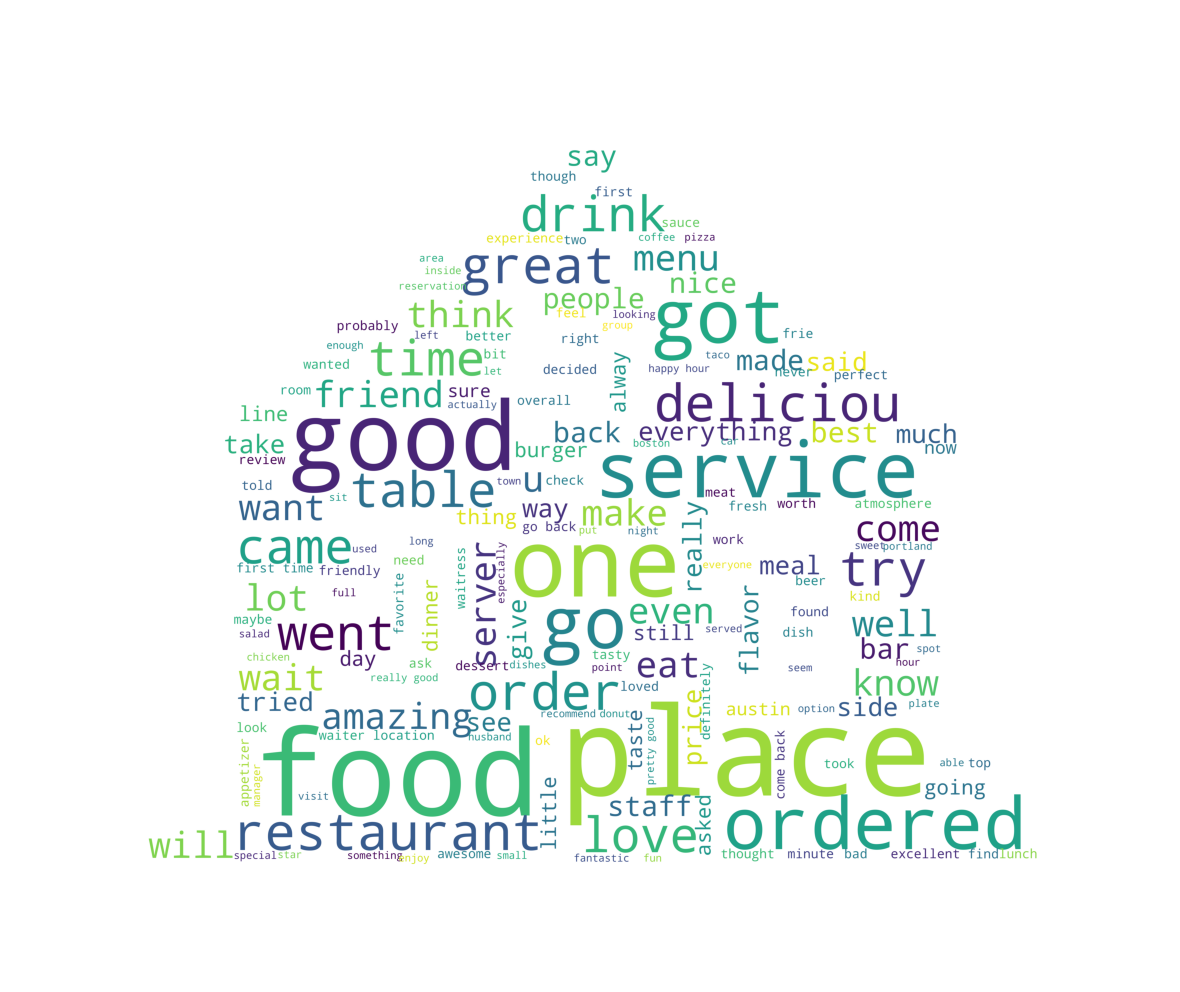

In [146]:
import matplotlib as mp
from wordcloud import WordCloud,STOPWORDS
from PIL import Image

house = np.array(Image.open('domek.jpg'))

names = ' '.join(df['text'].str.lower().values)
wordcloud = WordCloud(background_color='white',
                        height=900,
                        width=800,
                        scale=20, 
                        prefer_horizontal=0.9999,
                        mask=house 
                     ).generate(names)
plt.figure(figsize=[25, 18])
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('WordName.jpg', dpi=900, bbox_inches='tight', quality=95)
plt.show()

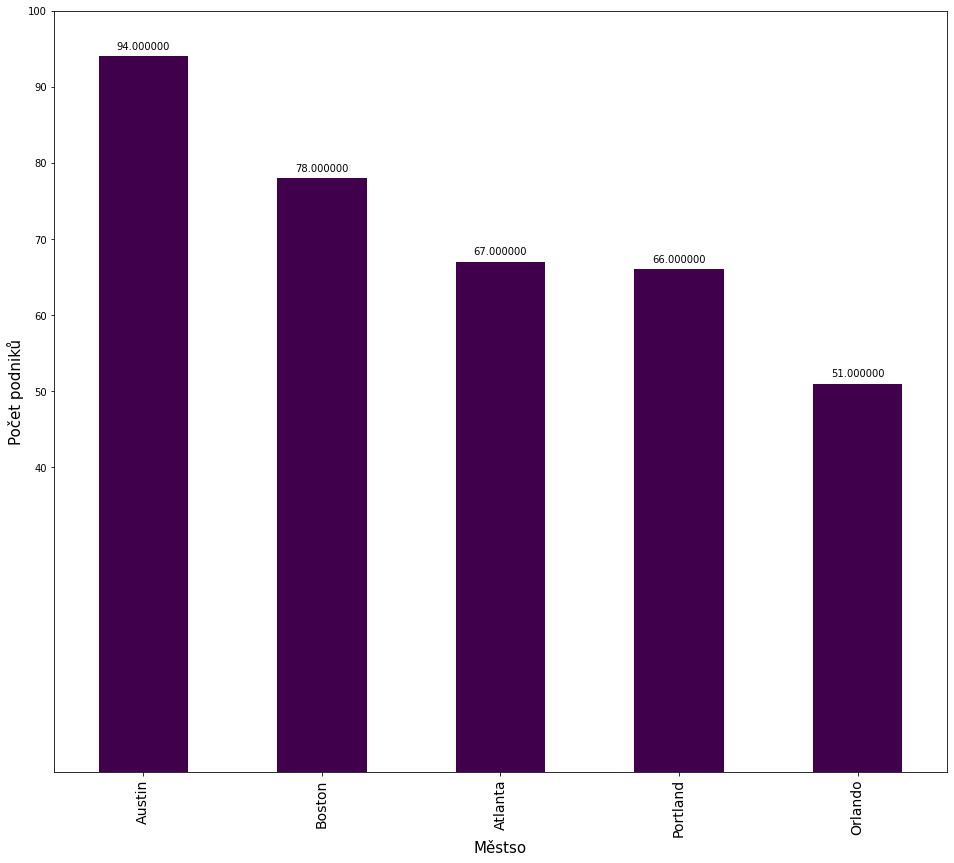

In [147]:
fig = plt.figure(figsize=(16,14))



ax = df.groupby('city').nunique()['business_id'].sort_values(ascending=False)[:10].plot(kind='bar',colormap='PRGn')
def barValuesVert(ax, spacing=5):
  
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'   
      
            
        label = "{:f}".format(y_value)
        ax.annotate(
            label,                     
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                      

barValuesVert(ax)
plt.ylabel('Počet podniků',fontsize=15) 
plt.xlabel('Městso',fontsize=15)
plt.xticks(fontsize = 14)
plt.grid
plt.yticks([40,50,60,70,80,90,100])


plt.show()

C:\Users\mates\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


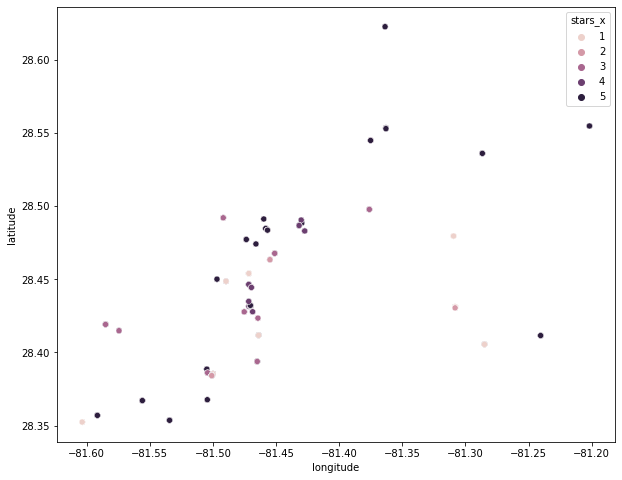

In [176]:
name = 'Orlando'
dfAustin = df.loc[df['city'] == name]

plt.figure(figsize=(10,8))

      
sns.scatterplot(dfAustin.longitude,dfAustin.latitude,hue=dfAustin.stars_x)
plt.ioff()

3         Orlando
5         Orlando
12        Orlando
19        Orlando
22        Orlando
           ...   
214788    Orlando
214831    Orlando
214851    Orlando
214858    Orlando
214872    Orlando
Name: city, Length: 27114, dtype: object

In [149]:
def regioncolors(counter):
    if counter['stars'] >= 4:
        return 'green'
    elif counter['stars'] >= 3:
        return 'blue'
    elif counter['stars']  >= 2:
        return 'orange'
    else:
        return 'red'
dfBus["color"] = dfBus.apply(regioncolors, axis=1)

In [150]:
import folium
import folium.plugins as plugins
locations = dfBus[['latitude', 'longitude']]
locationlist = locations.values.tolist()
len(locationlist)


map = folium.Map(location=[42.35, -71.05], tiles='CartoDB dark_matter', zoom_start=12)

# marker_cluster = plugins.MarkerCluster().add_to(map2)
dfBus['stars'] = dfBus['stars'].astype(str)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup='Name: ' +dfBus['name'][point] + ' Stars: '
                  +dfBus['stars'][point],icon=folium.Icon(color=dfBus['color'][point],
                            icon_color='white', icon='yelp', angle=0, prefix='fa')).add_to(map)
map.save('map.html')
map


## Answering analytical questions

#### Jaké jsou recenze v jednotlivých městech? S, N
#### Jaké jsou recenze podle typu podniku? N
#### Jaké podniky jsou v top 5, v top 10? S

### Návštěvníci
#### Charakteristika návštěvnosti jednotlivých typů podniků v daných městech. S
#### Jakých hodnot nabývají průměrně recenze? S
#### Charakteristika průměrného zákazníka (jestli je spíše pozitivní / negativní ) x město. N
#### Jestli uzivatel spravne dava hvezdicky na zaklade toho co nasledne napise. N


Text(0, 0.5, 'Město')

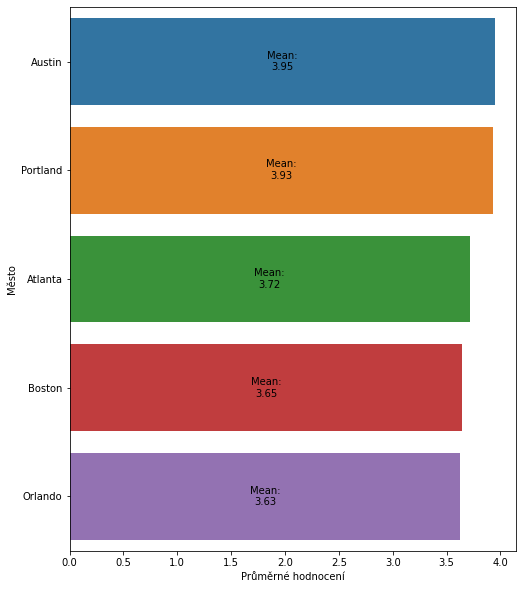

In [151]:
#Rezenze(hvězdy) podle měst

cities = list(dfBus['city'].unique())

avgStars=[]
dfBus['stars'] =dfBus['stars'].astype(float) 

for i in cities:
    x=dfBus[dfBus.city==i]
    avgStar=sum(x.stars)/len(x)
    avgStars.append(avgStar)

df1=pd.DataFrame({'cities':cities,'avgStars':avgStars})
new_index=df1.avgStars.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(8,10))

ax=sns.barplot(x=sorted_data.avgStars,y=sorted_data.cities)
ax.bar_label(ax.containers[-1], fmt='Mean:\n%.2f', label_type='center')
plt.grid(False)
plt.xlabel('Průměrné hodnocení')
plt.ylabel('Město')
# plt.savefig('CityStars.png', dpi=1500)

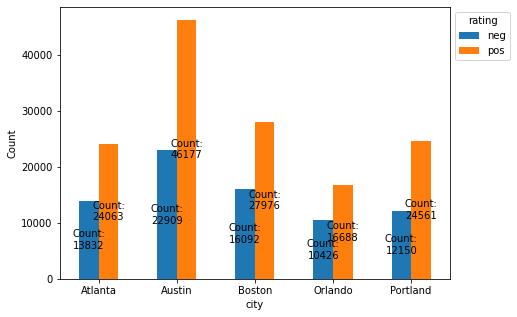

In [152]:
dfbar = df.groupby("city")['score'].value_counts().unstack()

ax = dfbar.plot(kind='bar', figsize=(7, 5), xlabel='city', ylabel='Count', rot=0)
ax.bar_label(ax.containers[-1], fmt='Count:\n%.d', label_type='center')
ax.bar_label(ax.containers[0], fmt='Count:\n%.d', label_type='center')
ax.legend(title='rating', bbox_to_anchor=(1, 1), loc='upper left')

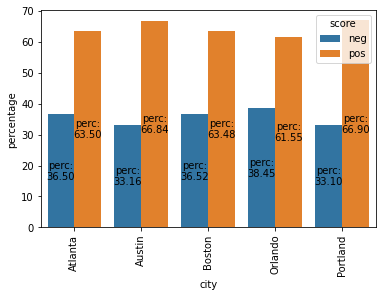

In [153]:
rev_percentage = (df.groupby(['city'])['score']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('score'))
p = sns.barplot(x="city", y="percentage", hue="score", data=rev_percentage)
p.bar_label(p.containers[-1], fmt='perc:\n%.2f', label_type='center')
p.bar_label(p.containers[0], fmt='perc:\n%.2f', label_type='center')
_ = plt.setp(p.get_xticklabels(), rotation=90)

In [179]:
#Top pět restaurací s  poz recenzemi
cat = 'pos'
dfpos = df.loc[df['score'] == cat]

dfpos.groupby(['name_x'])['score'].count().sort_values(ascending=False)[:5]

name_x
Hopdoddy Burger Bar                 3389
Blue Star Donuts                    2661
Terry Black's Barbecue              2527
South Congress Cafe                 1775
Gus's World Famous Fried Chicken    1730
Name: score, dtype: int64

In [220]:
df['stars_x'].agg('mean')

3.8689883373511917

In [185]:
df.groupby(["city", "stars_y"])['score'].value_counts()

city      stars_y  score
Atlanta   2.0      neg       308
                   pos       108
          2.5      neg       431
                   pos       288
          3.0      neg      1923
                            ... 
Portland  4.0      neg      6589
          4.5      pos      5745
                   neg      1966
          5.0      pos       550
                   neg       328
Name: score, Length: 62, dtype: int64

In [191]:
dfAustin = df.loc[df['city'] == 'Austin']
dfAtlanta = df.loc[df['city'] == 'Atlanta']
dfPortland = df.loc[df['city'] == 'Portland']
dfBoston = df.loc[df['city'] == 'Boston']
dfOrlando = df.loc[df['city'] == 'Orlando']


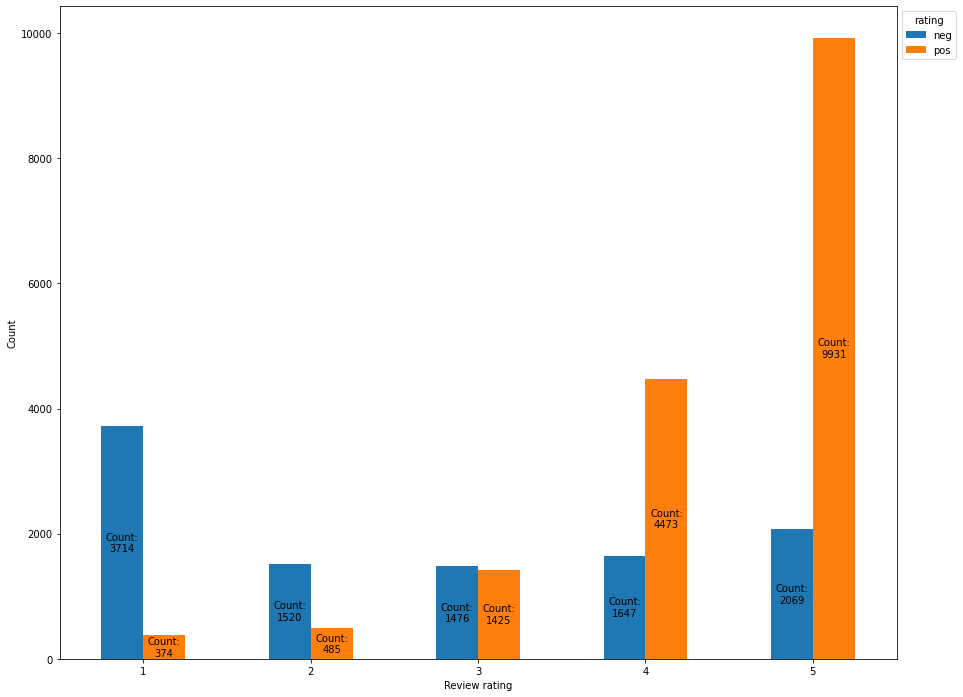

In [214]:
#hodnocení recenzentů ve srovnaní se sentiment analýzou
dfacc = dfOrlando.groupby("stars_x")['score'].value_counts().unstack()

ax = dfacc.plot(kind='bar', figsize=(15, 12), xlabel='Review rating', ylabel='Count', rot=0)
ax.bar_label(ax.containers[-1], fmt='Count:\n%.d', label_type='center')
ax.bar_label(ax.containers[0], fmt='Count:\n%.d', label_type='center')
ax.legend(title='rating', bbox_to_anchor=(1, 1), loc='upper left')

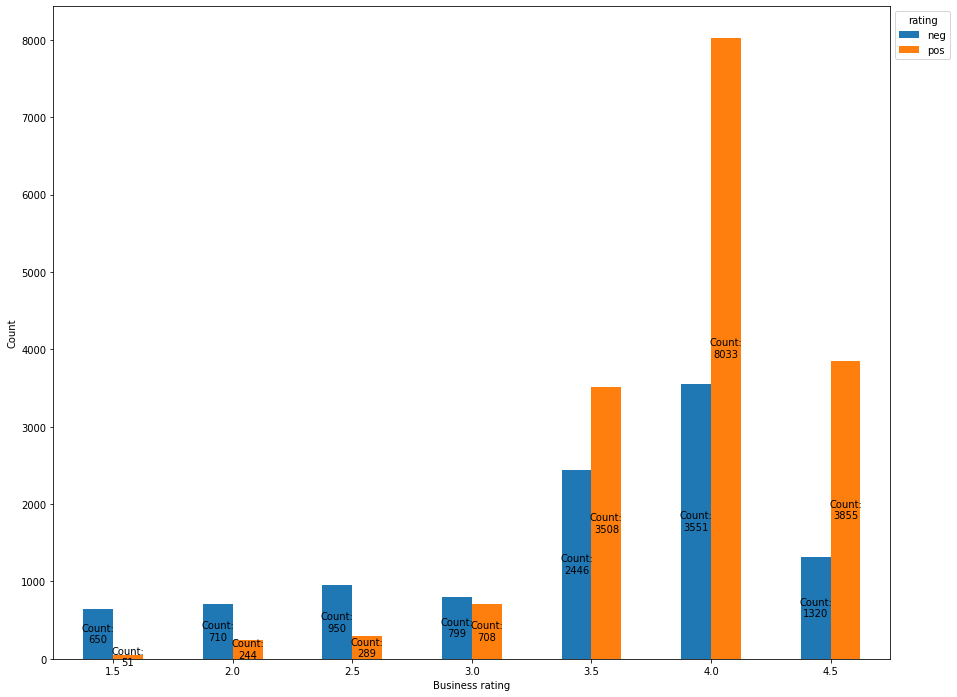

In [213]:
#hodnocení podniků ve srovnaní se sentiment analýzou
dfacc = dfOrlando.groupby("stars_y")['score'].value_counts().unstack()

ax = dfacc.plot(kind='bar', figsize=(15, 12), xlabel='Business rating', ylabel='Count', rot=0)
ax.bar_label(ax.containers[-1], fmt='Count:\n%.d', label_type='center')
ax.bar_label(ax.containers[0], fmt='Count:\n%.d', label_type='center')

ax.legend(title='rating', bbox_to_anchor=(1, 1), loc='upper left')

In [198]:
dfpos.groupby(['name_x'])['score'].count().sort_values(ascending=False)[:5]

6457      1.0
7851      1.0
20456     1.0
21323     1.0
23214     1.0
         ... 
208396    1.0
208412    1.0
208433    1.0
208442    1.0
208456    1.0
Name: stars_y, Length: 418, dtype: float64

In [240]:
#pocet recenzi dle uzivatelu
df['review_count_y'].agg(max)

14691

In [223]:
pocet recenzi dle podniku
df['review_count_x'].agg(max)

6221

In [228]:
df['stars_x'].value_counts()

5    93663
4    57316
3    26455
1    20479
2    16961
Name: stars_x, dtype: int64